<a href="https://colab.research.google.com/github/brahmjot1509/SVM-Parameter-Optimisation/blob/main/SVM_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brahmjot Kaur
102003736

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
     

In [18]:
df = pd.read_csv('heart.csv')

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [21]:
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [22]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print("In {}, mean of null value is : {}".format(feature, (df[feature].isnull().sum() / len(df)) * 100 ))

In [24]:

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [25]:
X = df.iloc[:,0:-1]
y = df['target']


In [26]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [27]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [28]:
samples

[(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
  491   57    1   2       150   168    0        1      174      0      1.6   
  356   59    1   0       164   176    1        0       90      0      1.0   
  10    71    0   0       112   149    0        1      125      0      1.6   
  105   47    1   0       110   275    0        0      118      1      1.0   
  68    37    0   2       120   215    0        1      170      0      0.0   
  ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
  835   49    1   2       118   149    0        0      126      0      0.8   
  192   67    0   2       115   564    0        0      160      0      1.6   
  629   65    1   3       138   282    1        0      174      0      1.4   
  559   67    1   0       120   237    0        1       71      0      1.0   
  684   60    1   2       140   185    0        0      155      0      3.0   
  
       slope  ca  thal  
  491      2   0     2  
  356      

In [29]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [30]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [31]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.99 Best Kernel =  rbf Best Nu =  3.82 Best Epsilon =  7.92
Best Accuracy =  0.98 Best Kernel =  rbf Best Nu =  7.03 Best Epsilon =  1.81
Best Accuracy =  0.95 Best Kernel =  rbf Best Nu =  3.04 Best Epsilon =  0.98
Best Accuracy =  0.99 Best Kernel =  rbf Best Nu =  1.61 Best Epsilon =  9.4
Best Accuracy =  1.0 Best Kernel =  rbf Best Nu =  6.41 Best Epsilon =  1.74
Best Accuracy =  0.97 Best Kernel =  rbf Best Nu =  3.76 Best Epsilon =  4.06
Best Accuracy =  0.96 Best Kernel =  rbf Best Nu =  4.48 Best Epsilon =  9.69
Best Accuracy =  0.99 Best Kernel =  rbf Best Nu =  2.16 Best Epsilon =  6.81
Best Accuracy =  0.99 Best Kernel =  rbf Best Nu =  1.76 Best Epsilon =  4.23
Best Accuracy =  0.97 Best Kernel =  rbf Best Nu =  6.14 Best Epsilon =  1.91


In [32]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.99,rbf,3.82,7.92
1,2,0.98,rbf,7.03,1.81
2,3,0.95,rbf,3.04,0.98
3,4,0.99,rbf,1.61,9.40
4,5,1.00,rbf,6.41,1.74
5,6,0.97,rbf,3.76,4.06
6,7,0.96,rbf,4.48,9.69
7,8,0.99,rbf,2.16,6.81
8,9,0.99,rbf,1.76,4.23
9,10,0.97,rbf,6.14,1.91


In [33]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [34]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [35]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)  

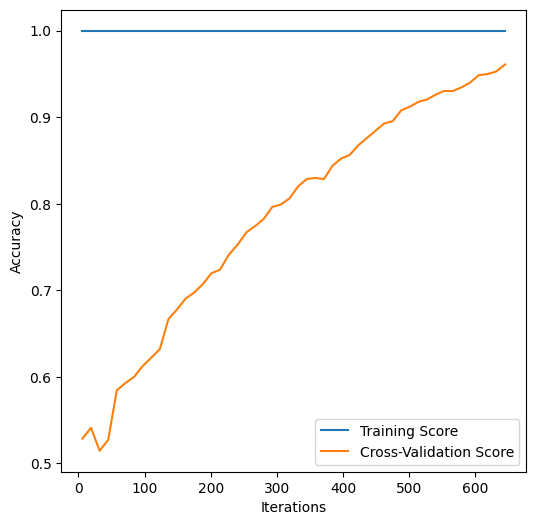

In [36]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()